In [7]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [10]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.5 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=c6e2389e33a30624fc866c370f2434ddf3aef3ccf0fa4a7a545704a86fa9bd21
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [11]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2842624/45929032 bytes (6.2%)7012352/45929032 bytes (15.3%)10911744/45929032 bytes (23.8%)14860288/45929032 bytes (32.4%)18776064/45929032 bytes (40.9%)22945792/45929032 bytes (50.0%)26861568/45929032 bytes (58.5%)31096832/45929032 bytes (67.7%)35168256/45929032 bytes (76.6%)39215104/45929032 bytes (85.4%)43245568/45929032 bytes (94.2%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [13]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [166]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

 #pixel size. by default 1 thake
gl.glColor3f(0,0,1)
gl.glPointSize(4)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(1,.35,)
gl.glVertex2f(1,1)
gl.glVertex2f(-1,1)
gl.glVertex2f(-1,.35)
gl.glEnd()

gl.glColor3f(0,1,0)
gl.glPointSize(4)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(1,-1)
gl.glVertex2f(1,.35)
gl.glVertex2f(-1,.35)
gl.glVertex2f(-1,-1)
gl.glEnd()

def drawpoints(x,y):
    gl.glPointSize(4) #pixel size. by default 1 thake
    gl.glColor3f(0,0,0)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x,y) #jekhane show korbe pixel
    gl.glEnd()

def ZoneFind (x1,y1,x2,y2):
    dx=x2-x1
    dy=y2-y1
    if abs(dx)>=abs(dy):
        if dx>=0 and dy>=0:
            zone=0
        elif dx<=0 and dy>=0:
            zone = 3
        elif dx>=0 and dy<=0:
            zone=7
        elif dx<=0 and dy<=0:
            zone=4
    else:
        if dx>=0 and dy>=0:
            zone=1
        elif dx<=0 and dy>=0:
            zone=2
        elif dx>=0 and dy<=0:
            zone=6
        elif dx<=0 and dy<=0:
            zone=5
    return zone
            
def Zone0(x,y,zone):  
    if zone==0:
        Xnew,Ynew=x,y
        return Xnew,Ynew
    elif zone==1:
        Xnew,Ynew=y,x
        return Xnew,Ynew
    elif zone==2:
        Xnew,Ynew=y, -x
        return Xnew,Ynew
    elif zone==3:
        Xnew,Ynew=-x,y
        return Xnew,Ynew
    elif zone==4:
        Xnew,Ynew=-x,-y
        return Xnew,Ynew
    elif zone==5:
        Xnew,Ynew=-y,-x
        return Xnew,Ynew
    elif zone==6:
        Xnew,Ynew=-y,x
        return Xnew,Ynew
    else:
        Xnew,Ynew=x,-y
        return Xnew,Ynew
        

def Midpoint(x1,y1,x2,y2):
    zone=ZoneFind(x1,y1,x2,y2)
    x1,y1=Zone0(x1,y1,zone) 
    x2,y2=Zone0(x2,y2,zone) 
    dx=x2-x1    
    dy=y2-y1
    dE=2*dy
    dNE=2*dy-2*dx
    
    x=x1
    y=y1
    if dy<=dx:
        d=(2*dy)-dx
        while (x<=x2):
            Originalzone(x,y,zone)
            if (d<0):
                d=d+dE
                x=x+0.01
            else:
                x=x+0.01
                y=y+0.01
                d=d+dNE
    else:
        d=(2*dx)-dy
        while y<=y2:
            Originalzone(x,y,zone)
            if d<0:
                d = d+ dNE
                y = y+0.01
            else:
                d=d+dE
                x=x+0.01
                y=y+0.01
                

def Originalzone(x,y,zone):   
    if zone==0:
        Xnew,Ynew=x,y
    if zone==1:
        Xnew,Ynew=y,x
    if zone==2:
        Xnew,Ynew=-y,x
    if zone==3:
        Xnew,Ynew=-x,y
    if zone==4:
        Xnew,Ynew=-x,-y
    if zone==5:
        Xnew,Ynew=-y,-x
    if zone==6:
        Xnew,Ynew=y,-x
    if zone==7:
        Xnew,Ynew=x,-y
    drawpoints (Xnew,Ynew) 

#Upline
Midpoint(-1,0.35,1,0.35)
#flag square
Midpoint(-.2,-.2,.2,-.2)
Midpoint(-.2,-.2,-.2,-.8)
Midpoint(-.2,-.5,.2,-.5)
Midpoint(.2,-.2,.2,-.5)
Midpoint(.2,-.2,.2,-.5)

Midpoint(-.2,-.2,-.2,-.8)
Midpoint(-.2,-.8,-.3,-.8,)
Midpoint(-.2,-.8,-.1,-.8,)




import math
def WritePixel(h,k,x, y):
    gl.glPointSize(3)
    gl.glColor3f(0,0, 0)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(h+x,k+y)
    gl.glEnd()

def MidpointCircle(h,k,radius):
  d=0.001-radius
  x=0
  y=radius
  Circlepoints(h,k,x,y)
  while(x<y):
    if d<0:
      #E
      d=d+(2*x)+.003
      x+=.001
    else:
      #SE
      d=d+(2*x)-(2*y)+.005
      x+=.001
      y-=.001
    Circlepoints(h,k,x,y)


def Circlepoints(h,k,x,y):
  WritePixel(h,k,x,y)
  WritePixel(h,k,y,x)
  WritePixel(h,k,y,-x)
  WritePixel(h,k,x,-y)
  WritePixel(h,k,-x,-y)
  WritePixel(h,k,-y,-x)
  WritePixel(h,k,-y,x)
  WritePixel(h,k,-x,y)

#halfff


def WritePixelhalf(h,k,x, y):
    gl.glPointSize(3)
    gl.glColor3f(0,0, 0)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(h+x,k+y)
    gl.glEnd()
    

def Midpointhalf(h,k,radius):
  d=0.001-radius
  x=0
  y=radius
  Circlepoints(h,k,x,y)
  while(x<y):
    if d<0:
      #E
      d=d+(2*x)+.003
      x+=.001
    else:
      #SE
      d=d+(2*x)-(2*y)+.005
      x+=.001
      y-=.001
    Circlepointshalf(h,k,x,y)


def Circlepointshalf(h,k,x,y):
  WritePixelhalf(h,k,x,y)
  WritePixelhalf(h,k,y,x)
  
  WritePixelhalf(h,k,-y,x)
  WritePixelhalf(h,k,-x,y)



MidpointCircle(0,-0.35,0.08)
Midpointhalf(0,0.35,0.3)



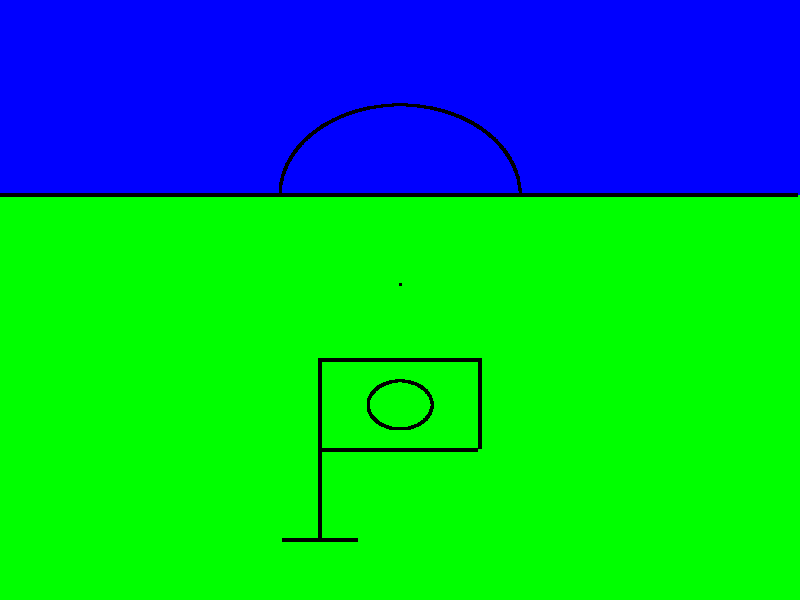

In [167]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)